In [ ]:
#Reading the data

In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("Quiz.txt")

In [24]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [25]:
data.default.unique()

array([1, 2], dtype=int64)

In [26]:
data.checking_balance.value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [27]:
data.savings_balance.value_counts()

< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [28]:
out = data.default

In [29]:
inp = data.drop(columns = "default", axis =1)

In [30]:
inp.shape

(1000, 20)

In [31]:
data.shape

(1000, 21)

In [138]:
#Splitting the data into ouput and input columns

In [32]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(inp, out, test_size=0.3,random_state = 100)

In [34]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
ytest.shape

(700, 20)
(700,)
(300, 20)


(300,)

In [46]:
inp = pd.get_dummies(inp)

In [47]:
inp.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,...,housing_own,housing_rent,telephone_none,telephone_yes,foreign_worker_no,foreign_worker_yes,job_mangement self-employed,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,1,0,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [139]:
#Applying Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model_DT = DecisionTreeClassifier()

In [49]:
model_DT.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
ypred = model_DT.predict(xtest)

In [51]:
ypred

array([1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1], d

In [140]:
#Finding the classification report

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.81      0.75      0.78       219
           2       0.43      0.52      0.47        81

   micro avg       0.69      0.69      0.69       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.71      0.69      0.69       300



In [141]:
#Performing hyper parametric tuning to the model

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5,shuffle = True, random_state =100)
hyper_params = [{'criterion': ["gini","entropy"],'max_depth':[10,20,30,40],'min_samples_split' :[10,20,30,40], "max_depth": [10,20,30,40], "min_samples_leaf":[20,30,40]}]
model_DTH = GridSearchCV(model_DT,param_grid=hyper_params,scoring = 'f1', cv = folds)
model_DTH.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [10, 20, 30, 40], 'min_samples_leaf': [20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [55]:
ypred_DTH = model_DTH.predict(xtest)

In [56]:
print(classification_report(ytest,ypred_DTH))

              precision    recall  f1-score   support

           1       0.78      0.91      0.84       219
           2       0.55      0.30      0.38        81

   micro avg       0.74      0.74      0.74       300
   macro avg       0.66      0.60      0.61       300
weighted avg       0.71      0.74      0.72       300



In [57]:
print(model_DTH.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 10}


In [58]:
confusion_matrix(ytest,ypred_DTH)

array([[199,  20],
       [ 57,  24]], dtype=int64)

In [142]:
#Find the probability values of predicted values and limiting the threshold

In [59]:
n = model_DTH.predict_proba(xtest)

In [60]:
n = pd.DataFrame(n)

In [61]:
n.head()

,0,1
0,0.876923,0.123077
1,0.541667,0.458333
2,0.902439,0.097561
3,0.803922,0.196078
4,0.545455,0.454545


In [62]:
lst = []
for i in n[0]:
    if(i>0.3):
        lst.append(1)
    else:
        lst.append(2)
        
n["Values"] = lst

In [63]:
n.head()

,0,1,Values
0,0.876923,0.123077,1
1,0.541667,0.458333,1
2,0.902439,0.097561,1
3,0.803922,0.196078,1
4,0.545455,0.454545,1


In [64]:
n.Values.value_counts()

1    271
2     29
Name: Values, dtype: int64

In [65]:
print(classification_report(ytest,n.Values))

              precision    recall  f1-score   support

           1       0.77      0.95      0.85       219
           2       0.62      0.22      0.33        81

   micro avg       0.75      0.75      0.75       300
   macro avg       0.69      0.59      0.59       300
weighted avg       0.73      0.75      0.71       300



In [66]:
con_DF =confusion_matrix(ytest,n.Values)
print(con_DF)
total_DF = sum(sum(con_DF))
acc_DF = (con_DF[0,0]+con_DF[1,1])/total_DF
print(acc_DF)
sen_DF = con_DF[0,0]/(con_DF[0,0]+con_DF[0,1])
print(sen_DF)
spec_DF= con_DF[1,1]/(con_DF[1,0]+con_DF[1,1])
print(spec_DF)

[[208  11]
 [ 63  18]]
0.7533333333333333
0.9497716894977168
0.2222222222222222


In [143]:
#Plotiing the ROC curve for the model

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

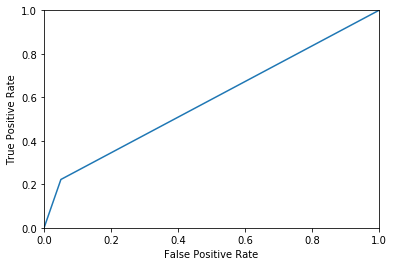

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
fpr,tpr,threshold = roc_curve(ytest,n.Values,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [144]:
#Applying Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Alwin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [71]:
model_RF = RandomForestClassifier()

In [72]:
model_RF.fit(xtrain,ytrain)

C:\Users\Alwin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
ypred_RF = model_RF.predict(xtest)
ypred_RF

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1], d

In [145]:
#Generating the classification report the model

In [74]:
print(classification_report(ytest,ypred_RF))

              precision    recall  f1-score   support

           1       0.77      0.87      0.82       219
           2       0.47      0.31      0.37        81

   micro avg       0.72      0.72      0.72       300
   macro avg       0.62      0.59      0.60       300
weighted avg       0.69      0.72      0.70       300



In [ ]:
#Applying hypermetric tuning to the model

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5,shuffle = True, random_state =100)
hyper_params = [{"n_estimators" : [10,20,30,40,50], 'criterion': ["gini","entropy"],'max_depth':[10,20,30,40],'min_samples_split' :[10,20,30,40]}]
model_RFH = GridSearchCV(model_RF,param_grid=hyper_params,scoring = 'f1', cv = folds)
model_RFH.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [76]:
ypred_RDH = model_RFH.predict(xtest)

In [77]:
print(classification_report(ytest,ypred_RDH))

              precision    recall  f1-score   support

           1       0.78      0.88      0.83       219
           2       0.50      0.32      0.39        81

   micro avg       0.73      0.73      0.73       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.70      0.73      0.71       300



In [78]:
print(model_RFH.best_params_)

{'criterion': 'gini', 'max_depth': 40, 'min_samples_split': 10, 'n_estimators': 30}


In [79]:
confusion_matrix(ytest,ypred_RDH)

array([[193,  26],
       [ 55,  26]], dtype=int64)

In [80]:
n_rf = model_RFH.predict_proba(xtest)
n_rf = pd.DataFrame(n_rf)
n_rf.head()

,0,1
0,0.757726,0.242274
1,0.343062,0.656938
2,0.763317,0.236683
3,0.756761,0.243239
4,0.680823,0.319177


In [81]:
lst = []
for i in n_rf[0]:
    if(i>0.5):
        lst.append(1)
    else:
        lst.append(2)
        
n_rf["Values"] = lst

In [82]:
n_rf.Values.value_counts()

1    248
2     52
Name: Values, dtype: int64

In [83]:
print(classification_report(ytest,n_rf.Values))

              precision    recall  f1-score   support

           1       0.78      0.88      0.83       219
           2       0.50      0.32      0.39        81

   micro avg       0.73      0.73      0.73       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.70      0.73      0.71       300



In [84]:
con_RF =confusion_matrix(ytest,n_rf.Values)
print(con_RF)
total_RF = sum(sum(con_RF))
acc_RF = (con_RF[0,0]+con_RF[1,1])/total_RF
print(acc_RF)
sen_RF = con_RF[0,0]/(con_RF[0,0]+con_RF[0,1])
print(sen_RF)
spec_RF= con_RF[1,1]/(con_RF[1,0]+con_RF[1,1])
print(spec_RF)

[[193  26]
 [ 55  26]]
0.73
0.8812785388127854
0.32098765432098764


In [146]:
#Plotting ROC Curve for the same

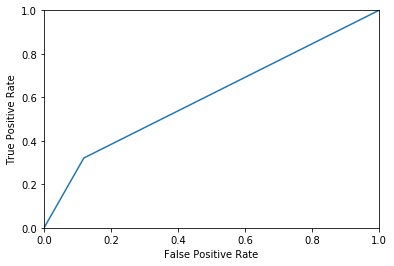

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
fpr,tpr,threshold = roc_curve(ytest,ypred_RDH,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [63]:
from catboost import CatBoostClassifier

In [64]:
model_CB = CatBoostClassifier()

In [65]:
model_CB.fit(xtrain,ytrain)

Learning rate set to 0.015146
0:	learn: 0.6863491	total: 68.1ms	remaining: 1m 8s
1:	learn: 0.6803360	total: 120ms	remaining: 60s
2:	learn: 0.6738670	total: 166ms	remaining: 55.2s
3:	learn: 0.6680402	total: 205ms	remaining: 50.9s
4:	learn: 0.6626471	total: 258ms	remaining: 51.4s
5:	learn: 0.6562723	total: 310ms	remaining: 51.3s
6:	learn: 0.6504860	total: 351ms	remaining: 49.8s
7:	learn: 0.6459329	total: 390ms	remaining: 48.4s
8:	learn: 0.6408341	total: 459ms	remaining: 50.5s
9:	learn: 0.6366868	total: 526ms	remaining: 52s
10:	learn: 0.6316277	total: 575ms	remaining: 51.7s
11:	learn: 0.6268706	total: 639ms	remaining: 52.6s
12:	learn: 0.6220552	total: 698ms	remaining: 53s
13:	learn: 0.6171646	total: 753ms	remaining: 53s
14:	learn: 0.6118185	total: 800ms	remaining: 52.5s
15:	learn: 0.6080719	total: 865ms	remaining: 53.2s
16:	learn: 0.6040887	total: 939ms	remaining: 54.3s
17:	learn: 0.6020442	total: 1.05s	remaining: 57.3s
18:	learn: 0.5975333	total: 1.17s	remaining: 1m
19:	learn: 0.5939204	

163:	learn: 0.4121247	total: 9.15s	remaining: 46.6s
164:	learn: 0.4113532	total: 9.19s	remaining: 46.5s
165:	learn: 0.4108962	total: 9.23s	remaining: 46.4s
166:	learn: 0.4102527	total: 9.28s	remaining: 46.3s
167:	learn: 0.4099828	total: 9.32s	remaining: 46.2s
168:	learn: 0.4091614	total: 9.36s	remaining: 46s
169:	learn: 0.4088530	total: 9.4s	remaining: 45.9s
170:	learn: 0.4084559	total: 9.45s	remaining: 45.8s
171:	learn: 0.4078160	total: 9.5s	remaining: 45.7s
172:	learn: 0.4074087	total: 9.55s	remaining: 45.7s
173:	learn: 0.4066624	total: 9.59s	remaining: 45.5s
174:	learn: 0.4063237	total: 9.64s	remaining: 45.4s
175:	learn: 0.4058621	total: 9.68s	remaining: 45.3s
176:	learn: 0.4049993	total: 9.74s	remaining: 45.3s
177:	learn: 0.4044274	total: 9.78s	remaining: 45.1s
178:	learn: 0.4038498	total: 9.82s	remaining: 45s
179:	learn: 0.4032817	total: 9.87s	remaining: 45s
180:	learn: 0.4027129	total: 9.93s	remaining: 44.9s
181:	learn: 0.4023111	total: 9.99s	remaining: 44.9s
182:	learn: 0.401691

324:	learn: 0.3401856	total: 16.9s	remaining: 35.1s
325:	learn: 0.3400281	total: 17s	remaining: 35s
326:	learn: 0.3398251	total: 17s	remaining: 35s
327:	learn: 0.3393921	total: 17.1s	remaining: 35s
328:	learn: 0.3390128	total: 17.1s	remaining: 34.9s
329:	learn: 0.3387350	total: 17.2s	remaining: 34.9s
330:	learn: 0.3384456	total: 17.2s	remaining: 34.8s
331:	learn: 0.3380663	total: 17.3s	remaining: 34.7s
332:	learn: 0.3377494	total: 17.3s	remaining: 34.7s
333:	learn: 0.3373153	total: 17.4s	remaining: 34.6s
334:	learn: 0.3372687	total: 17.4s	remaining: 34.5s
335:	learn: 0.3371575	total: 17.4s	remaining: 34.4s
336:	learn: 0.3364348	total: 17.5s	remaining: 34.4s
337:	learn: 0.3363097	total: 17.5s	remaining: 34.3s
338:	learn: 0.3360839	total: 17.6s	remaining: 34.3s
339:	learn: 0.3355386	total: 17.6s	remaining: 34.2s
340:	learn: 0.3353802	total: 17.7s	remaining: 34.1s
341:	learn: 0.3349744	total: 17.7s	remaining: 34.1s
342:	learn: 0.3345190	total: 17.8s	remaining: 34s
343:	learn: 0.3343878	to

487:	learn: 0.2916395	total: 24.6s	remaining: 25.9s
488:	learn: 0.2915469	total: 24.7s	remaining: 25.8s
489:	learn: 0.2912880	total: 24.7s	remaining: 25.7s
490:	learn: 0.2911623	total: 24.8s	remaining: 25.7s
491:	learn: 0.2908787	total: 24.8s	remaining: 25.6s
492:	learn: 0.2903905	total: 24.9s	remaining: 25.6s
493:	learn: 0.2901776	total: 24.9s	remaining: 25.5s
494:	learn: 0.2899926	total: 25s	remaining: 25.5s
495:	learn: 0.2898152	total: 25s	remaining: 25.4s
496:	learn: 0.2897335	total: 25.1s	remaining: 25.4s
497:	learn: 0.2895730	total: 25.1s	remaining: 25.3s
498:	learn: 0.2893886	total: 25.2s	remaining: 25.3s
499:	learn: 0.2891076	total: 25.2s	remaining: 25.2s
500:	learn: 0.2889862	total: 25.3s	remaining: 25.2s
501:	learn: 0.2885912	total: 25.3s	remaining: 25.1s
502:	learn: 0.2883954	total: 25.4s	remaining: 25.1s
503:	learn: 0.2881074	total: 25.4s	remaining: 25s
504:	learn: 0.2880308	total: 25.5s	remaining: 25s
505:	learn: 0.2878597	total: 25.5s	remaining: 24.9s
506:	learn: 0.287742

650:	learn: 0.2509499	total: 32.6s	remaining: 17.5s
651:	learn: 0.2506892	total: 32.6s	remaining: 17.4s
652:	learn: 0.2505269	total: 32.7s	remaining: 17.4s
653:	learn: 0.2500326	total: 32.7s	remaining: 17.3s
654:	learn: 0.2498349	total: 32.8s	remaining: 17.3s
655:	learn: 0.2496610	total: 32.8s	remaining: 17.2s
656:	learn: 0.2494096	total: 32.9s	remaining: 17.2s
657:	learn: 0.2491799	total: 32.9s	remaining: 17.1s
658:	learn: 0.2489466	total: 33s	remaining: 17.1s
659:	learn: 0.2487738	total: 33s	remaining: 17s
660:	learn: 0.2485079	total: 33.1s	remaining: 17s
661:	learn: 0.2483203	total: 33.1s	remaining: 16.9s
662:	learn: 0.2480069	total: 33.2s	remaining: 16.9s
663:	learn: 0.2478868	total: 33.2s	remaining: 16.8s
664:	learn: 0.2474678	total: 33.3s	remaining: 16.8s
665:	learn: 0.2471796	total: 33.3s	remaining: 16.7s
666:	learn: 0.2467854	total: 33.4s	remaining: 16.7s
667:	learn: 0.2464753	total: 33.4s	remaining: 16.6s
668:	learn: 0.2460946	total: 33.5s	remaining: 16.6s
669:	learn: 0.245928

812:	learn: 0.2136286	total: 40.6s	remaining: 9.34s
813:	learn: 0.2135627	total: 40.7s	remaining: 9.29s
814:	learn: 0.2134599	total: 40.7s	remaining: 9.24s
815:	learn: 0.2133069	total: 40.8s	remaining: 9.19s
816:	learn: 0.2131285	total: 40.8s	remaining: 9.14s
817:	learn: 0.2130458	total: 40.9s	remaining: 9.1s
818:	learn: 0.2128910	total: 40.9s	remaining: 9.04s
819:	learn: 0.2125656	total: 41s	remaining: 8.99s
820:	learn: 0.2124054	total: 41s	remaining: 8.94s
821:	learn: 0.2123411	total: 41.1s	remaining: 8.89s
822:	learn: 0.2123030	total: 41.1s	remaining: 8.84s
823:	learn: 0.2119946	total: 41.2s	remaining: 8.79s
824:	learn: 0.2117832	total: 41.2s	remaining: 8.74s
825:	learn: 0.2116037	total: 41.3s	remaining: 8.69s
826:	learn: 0.2114213	total: 41.3s	remaining: 8.64s
827:	learn: 0.2111945	total: 41.4s	remaining: 8.59s
828:	learn: 0.2109388	total: 41.4s	remaining: 8.54s
829:	learn: 0.2107535	total: 41.5s	remaining: 8.49s
830:	learn: 0.2104771	total: 41.5s	remaining: 8.45s
831:	learn: 0.210

972:	learn: 0.1859764	total: 48.6s	remaining: 1.35s
973:	learn: 0.1859214	total: 48.6s	remaining: 1.3s
974:	learn: 0.1857735	total: 48.7s	remaining: 1.25s
975:	learn: 0.1856541	total: 48.8s	remaining: 1.2s
976:	learn: 0.1855031	total: 48.8s	remaining: 1.15s
977:	learn: 0.1853774	total: 48.9s	remaining: 1.1s
978:	learn: 0.1853325	total: 48.9s	remaining: 1.05s
979:	learn: 0.1852128	total: 49s	remaining: 1000ms
980:	learn: 0.1850878	total: 49s	remaining: 950ms
981:	learn: 0.1850531	total: 49.1s	remaining: 900ms
982:	learn: 0.1850112	total: 49.1s	remaining: 850ms
983:	learn: 0.1847584	total: 49.2s	remaining: 800ms
984:	learn: 0.1847223	total: 49.2s	remaining: 750ms
985:	learn: 0.1846446	total: 49.3s	remaining: 700ms
986:	learn: 0.1845925	total: 49.3s	remaining: 650ms
987:	learn: 0.1843092	total: 49.4s	remaining: 600ms
988:	learn: 0.1839380	total: 49.4s	remaining: 550ms
989:	learn: 0.1837689	total: 49.5s	remaining: 500ms
990:	learn: 0.1835816	total: 49.5s	remaining: 450ms
991:	learn: 0.1835

In [70]:
ypred_CB = model_CB.predict(xtest)
ypred_CB

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0.

In [68]:
print(classification_report(ytest,ypred_CB))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.33      0.11      0.17       202
         2.0       0.00      0.00      0.00        98

   micro avg       0.08      0.08      0.08       300
   macro avg       0.11      0.04      0.06       300
weighted avg       0.22      0.08      0.11       300



C:\Users\Alwin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alwin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [147]:
#Applying Ada Boost Classifier

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
model_AD = AdaBoostClassifier()

In [88]:
model_AD.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [89]:
ypred_AD = model_AD.predict(xtest)

In [90]:
ypred_AD

array([2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1], d

In [91]:
print(classification_report(ytest,ypred_AD))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82       219
           2       0.51      0.47      0.49        81

   micro avg       0.73      0.73      0.73       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.73      0.73      0.73       300



In [148]:
#Hyper parametric tuning

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5,shuffle = True, random_state =100)
hyper_params = [{"algorithm" : ["SAMME","SAMME.R"], 'n_estimators': [30,40,50,20],'learning_rate':[1,0.8,0.9,1.5],'random_state' :[100]}]
model_ADH = GridSearchCV(model_AD,param_grid=hyper_params,scoring = 'f1', cv = folds)
model_ADH.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [30, 40, 50, 20], 'learning_rate': [1, 0.8, 0.9, 1.5], 'random_state': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [93]:
ypred_ADH = model_ADH.predict(xtest)

In [94]:
print(classification_report(ytest,ypred_ADH))

              precision    recall  f1-score   support

           1       0.82      0.83      0.82       219
           2       0.52      0.51      0.51        81

   micro avg       0.74      0.74      0.74       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.74      0.74      0.74       300



In [95]:
model_ADH.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1.5,
 'n_estimators': 40,
 'random_state': 100}

In [96]:
model_ADH.predict_proba(xtest)

array([[0.5244704 , 0.4755296 ],
       [0.48986107, 0.51013893],
       [0.50163162, 0.49836838],
       [0.50230328, 0.49769672],
       [0.49500873, 0.50499127],
       [0.49816185, 0.50183815],
       [0.52651017, 0.47348983],
       [0.50143359, 0.49856641],
       [0.49201437, 0.50798563],
       [0.49226697, 0.50773303],
       [0.52348186, 0.47651814],
       [0.48582347, 0.51417653],
       [0.49697016, 0.50302984],
       [0.5064263 , 0.4935737 ],
       [0.48745003, 0.51254997],
       [0.48458139, 0.51541861],
       [0.49943809, 0.50056191],
       [0.49985405, 0.50014595],
       [0.48788633, 0.51211367],
       [0.52686305, 0.47313695],
       [0.49925659, 0.50074341],
       [0.49081061, 0.50918939],
       [0.49256643, 0.50743357],
       [0.49226994, 0.50773006],
       [0.49222368, 0.50777632],
       [0.48788315, 0.51211685],
       [0.52662569, 0.47337431],
       [0.5227525 , 0.4772475 ],
       [0.49825321, 0.50174679],
       [0.52201412, 0.47798588],
       [0.

In [97]:
confusion_matrix(ytest,ypred_ADH)

array([[181,  38],
       [ 40,  41]], dtype=int64)

In [98]:
n_ad = model_ADH.predict_proba(xtest)
n_ad = pd.DataFrame(n_ad)
n_ad.head()

,0,1
0,0.524470,0.475530
1,0.489861,0.510139
2,0.501632,0.498368
3,0.502303,0.497697
4,0.495009,0.504991


In [99]:
lst = []
for i in n_ad[0]:
    if(i>0.5):
        lst.append(1)
    else:
        lst.append(2)
        
n_ad["Values"] = lst

In [100]:
n_ad.Values.value_counts()

1    165
2    135
Name: Values, dtype: int64

In [101]:
print(classification_report(ytest,n_ad.Values))

              precision    recall  f1-score   support

           1       0.86      0.65      0.74       219
           2       0.43      0.72      0.54        81

   micro avg       0.67      0.67      0.67       300
   macro avg       0.65      0.68      0.64       300
weighted avg       0.74      0.67      0.68       300



In [102]:
con_AD =confusion_matrix(ytest,n_ad.Values)
print(con_AD)
total_AD = sum(sum(con_AD))
acc_AD = (con_AD[0,0]+con_AD[1,1])/total_AD
print(acc_AD)
sen_AD = con_AD[0,0]/(con_AD[0,0]+con_AD[0,1])
print(sen_AD)
spec_AD= con_AD[1,1]/(con_AD[1,0]+con_AD[1,1])
print(spec_AD)

[[142  77]
 [ 23  58]]
0.6666666666666666
0.6484018264840182
0.7160493827160493


In [149]:
#ROC curve for Ada boost

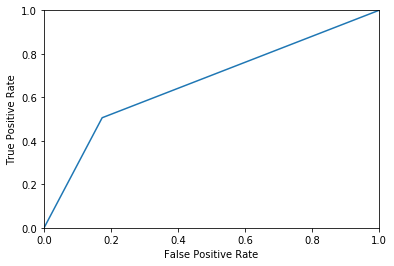

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
fpr,tpr,threshold = roc_curve(ytest,ypred_ADH,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [150]:
#Applying KNN classifier

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
k_mod = KNeighborsClassifier(n_neighbors=1)

In [106]:
k_mod.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [107]:
ypred_KNN = k_mod.predict(xtest)

In [108]:
print(classification_report(ytest,ypred_KNN))

              precision    recall  f1-score   support

           1       0.74      0.74      0.74       219
           2       0.28      0.28      0.28        81

   micro avg       0.61      0.61      0.61       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.61      0.61      0.61       300



In [109]:
print(confusion_matrix(ytest,ypred_KNN))

[[161  58]
 [ 58  23]]


In [151]:
#Hyper parametric Tuning

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5,shuffle = True, random_state =100)
hyper_params = [{"n_neighbors" : [5,10,8,13], 'algorithm': ["auto","ball_tree","kd_tree", "brute"],'leaf_size':[20,30,40]}]
model_KNN = GridSearchCV(k_mod,param_grid=hyper_params,scoring = 'f1', cv = folds)
model_KNN.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [5, 10, 8, 13], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [111]:
ypred_KNNH = model_KNN.predict(xtest)

In [112]:
print(classification_report(ytest,ypred_KNNH))

              precision    recall  f1-score   support

           1       0.74      0.93      0.83       219
           2       0.40      0.12      0.19        81

   micro avg       0.71      0.71      0.71       300
   macro avg       0.57      0.53      0.51       300
weighted avg       0.65      0.71      0.65       300



In [113]:
print(model_KNN.best_params_)

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 8}


In [114]:
print(confusion_matrix(ytest,ypred_KNNH))

[[204  15]
 [ 71  10]]


In [115]:
n_KNN = model_KNN.predict_proba(xtest)
n_KNN = pd.DataFrame(n_KNN)
n_KNN.head()

,0,1
0,0.750,0.250
1,0.625,0.375
2,1.000,0.000
3,0.750,0.250
4,0.750,0.250


In [116]:
lst = []
for i in n_KNN[0]:
    if(i>0.5):
        lst.append(1)
    else:
        lst.append(2)
        
n_KNN["Values"] = lst

In [117]:
n_KNN.Values.value_counts()

1    233
2     67
Name: Values, dtype: int64

In [118]:
print(classification_report(ytest,n_KNN.Values))

              precision    recall  f1-score   support

           1       0.75      0.80      0.77       219
           2       0.34      0.28      0.31        81

   micro avg       0.66      0.66      0.66       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.64      0.66      0.65       300



In [121]:
con_KNN =confusion_matrix(ytest,ypred_KNNH)
print(con_KNN)
total_KNN = sum(sum(con_KNN))
acc_KNN = (con_KNN[0,0]+con_KNN[1,1])/total_KNN
print(acc_KNN)
sen_KNN = con_KNN[0,0]/(con_KNN[0,0]+con_KNN[0,1])
print(sen_KNN)
spec_KNN = con_KNN[1,1]/(con_KNN[1,0]+con_KNN[1,1])
print(spec_KNN)

[[204  15]
 [ 71  10]]
0.7133333333333334
0.9315068493150684
0.12345679012345678


In [152]:
#ROC curve for the model

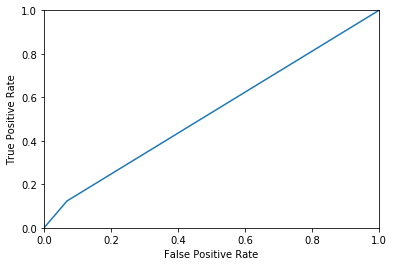

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
fpr,tpr,threshold = roc_curve(ytest,ypred_KNNH,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [153]:
#Applying Naives Bayes Algorithm

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
nv = GaussianNB()

In [126]:
nv.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
yped_NB=nv.predict(xtest)

In [128]:
print(classification_report(ytest,yped_NB))

              precision    recall  f1-score   support

           1       0.81      0.74      0.77       219
           2       0.43      0.54      0.48        81

   micro avg       0.68      0.68      0.68       300
   macro avg       0.62      0.64      0.63       300
weighted avg       0.71      0.68      0.69       300



In [129]:
con =confusion_matrix(ytest,yped_NB)

In [130]:
total_NB = sum(sum(con))

In [131]:
acc_NB = (con[0,0]+con[1,1])/total_NB
acc_NB

0.6833333333333333

In [132]:
sen_NB = con[0,0]/(con[0,0]+con[0,1])
sen_NB

0.7351598173515982

In [133]:
spec_NB = con[1,1]/(con[1,0]+con[1,1])
spec_NB

0.5432098765432098

In [134]:
con =confusion_matrix(ytest,yped_NB)
total_NB = sum(sum(con))
acc_NB = (con[0,0]+con[1,1])/total_NB
acc_NB
sen_NB = con[0,0]/(con[0,0]+con[0,1])
sen_NB
spec_NB = con[1,1]/(con[1,0]+con[1,1])
spec_NB

0.5432098765432098

In [154]:
#ROC Curve

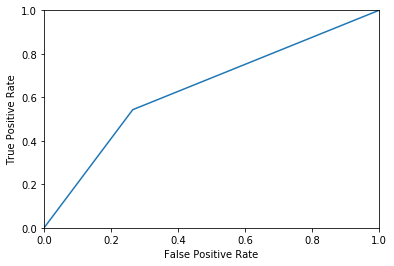

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
fpr,tpr,threshold = roc_curve(ytest,yped_NB,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [155]:
#ROC Curve for the model together

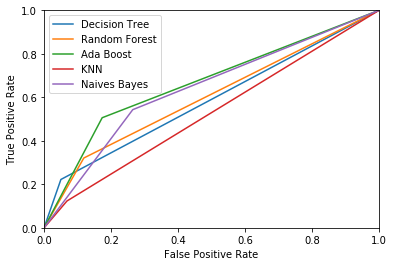

In [158]:
fpr,tpr,threshold = roc_curve(ytest,n.Values,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
fpr,tpr,threshold = roc_curve(ytest,ypred_RDH,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
fpr,tpr,threshold = roc_curve(ytest,ypred_ADH,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
fpr,tpr,threshold = roc_curve(ytest,ypred_KNNH,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
fpr,tpr,threshold = roc_curve(ytest,yped_NB,pos_label =2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["Decision Tree", "Random Forest", "Ada Boost", "KNN", "Naives Bayes"])